In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [2]:
rw = pd.read_csv("winequality-red.csv")

In [5]:
rw.shape

(1599, 12)

In [30]:
rw.columns=['fixed_acidity','volatile_acidity','citric_acid','residual_sugar',
            'chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density',
            'pH','sulphates','alcohol','quality']

In [34]:
X = MS(rw.columns.drop(['citric_acid','pH'])).fit_transform(rw)
multimodel = sm.OLS(rw.pH,X).fit()
summarize(multimodel)

,coef,std err,t,P>|t|
intercept,-60.5670,2.321000,-26.094,0.000
fixed_acidity,-0.0986,0.002000,-48.506,0.000
volatile_acidity,0.0214,0.014000,1.555,0.120
residual_sugar,-0.0258,0.002000,-13.912,0.000
chlorides,-0.5385,0.052000,-10.436,0.000
free_sulfur_dioxide,0.0017,0.000000,5.954,0.000
total_sulfur_dioxide,-0.0008,0.000091,-8.785,0.000
density,64.3451,2.326000,27.663,0.000
sulphates,-0.0708,0.015000,-4.675,0.000
alcohol,0.0729,0.003000,24.066,0.000


(i) All the predictors except volatile_acidity appear to have a statistically significant relationship to the response variable. In linear regression, each coefficient is tested with a t-test of null hypothesis, $H_0: \beta_j = 0$ with a significance level, $\alpha = 0.05$ ($95\%$ confidence level). If the p-value is $< 0.05$, we reject this null hypothesis and conclude that the predictor has a statistically significant association with the response variable. In our case, p-values of all predictors are less than $0.05$ except volatile_acidity which has a p-value of $0.120 > 0.05$. Thus, all the predictors except volatile_acidity appear to have a statistically significant relationship to the response.

(ii) In simple terms, the coefficient for the free_sulfur_dioxide variable suggests that for each unit increase in free_sulfur_dioxide, the model predicts a $0.0017$ unit increase in the level of pH, holding all other predictors fixed. 

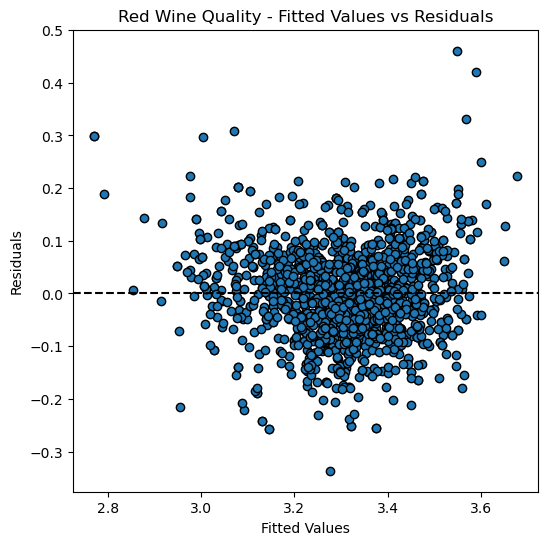

In [69]:
rwplot = subplots(figsize=(6,6))[1]
rwplot.scatter(multimodel.fittedvalues, multimodel.resid,edgecolor="black")
rwplot.set_title('Red Wine Quality - Fitted Values vs Residuals')
rwplot.set_xlabel('Fitted Values')
rwplot.set_ylabel('Residuals')
rwplot.axhline(0,c='k',ls='--')

151

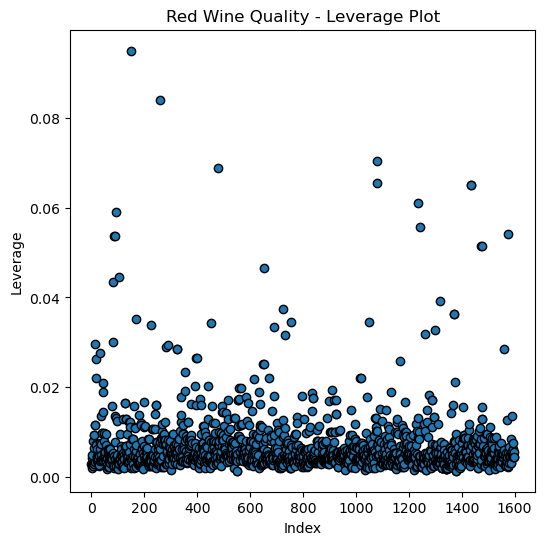

In [52]:
infl = multimodel.get_influence()
rwplot2 = subplots(figsize = (6,6))[1]
rwplot2.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag, edgecolor = "black")
rwplot2.set_title('Red Wine Quality - Leverage Plot')
rwplot2.set_xlabel('Index')
rwplot2.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

From the leverage plot, we observe several points with unusually high leverage. For instance, two observations are beyond $0.08$ in leverage and might be considered as having high leverage. $5$ observations are between $0.06$ and $0.08$ in leverage. They can also be considered as high-leverage observations. The outlier with the maximum leverage is the $151^{st}$ observation. 

In [55]:
X = MS(['fixed_acidity','volatile_acidity',
        ('fixed_acidity','volatile_acidity')]).fit_transform(rw)
interaction1 = sm.OLS(rw.alcohol, X).fit()
summarize(interaction1)

,coef,std err,t,P>|t|
intercept,10.9439,0.413,26.479,0.000
fixed_acidity,0.0253,0.048,0.529,0.597
volatile_acidity,0.2954,0.780,0.379,0.705
fixed_acidity:volatile_acidity,-0.2057,0.093,-2.202,0.028


The interaction between fixed_acidity and volatile_acidity is NOT statistically significant (p-value $= 0.028 > 0.05$)  when predicting alcohol.

In [56]:
X = MS(['citric_acid','residual_sugar',
        ('citric_acid','residual_sugar')]).fit_transform(rw)
interaction2 = sm.OLS(rw.alcohol,X).fit() 
summarize(interaction2)

,coef,std err,t,P>|t|
intercept,10.5427,0.104,101.624,0.000
citric_acid,-0.4165,0.287,-1.452,0.147
residual_sugar,-0.1129,0.039,-2.923,0.004
citric_acid:residual_sugar,0.3849,0.097,3.954,0.000


The interaction between citric_acid and residual_sugar is statistically significant (p-value $= 0.000 << 0.05$) when predicting alcohol.

In [59]:
X = MS(['chlorides','total_sulfur_dioxide',
        ('chlorides','total_sulfur_dioxide')]).fit_transform(rw)
interaction3 = sm.OLS(rw.alcohol, X).fit()
summarize(interaction3)

,coef,std err,t,P>|t|
intercept,10.8354,0.110,98.070,0.000
chlorides,-1.2096,1.205,-1.004,0.316
total_sulfur_dioxide,-0.0003,0.002,-0.167,0.868
chlorides:total_sulfur_dioxide,-0.0704,0.021,-3.332,0.001


The interaction between chlorides and total_sulfur_dioxide is statistically significant (p-value $= 0.001 << 0.05$) when predicting alcohol.